In [1]:
import datetime
from dateutil.relativedelta import relativedelta
#from datetime import timedelta
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
from matplotlib.lines import Line2D
import matplotlib.animation as animation

import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('./BuyOffersByQtyPurchased.csv', header=0, index_col=0)

In [4]:
df.dropna(inplace=True)

In [5]:
filt_Gen = df['CatalogBinding'] == 'General'
#filt_GenComp = df_comp['CatalogBinding'] == 'General'
df_Gen = df[filt_Gen].reset_index(drop=True)

In [ ]:
plt_val = np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'])
plt_STHist = np.nan_to_num(np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Sold'])[0]/
     np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Item_Count'])[0])
plt_ST = (df_Gen[filt_ST]['Total_Sold']/df_Gen[filt_ST]['Total_Item_Count'])

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


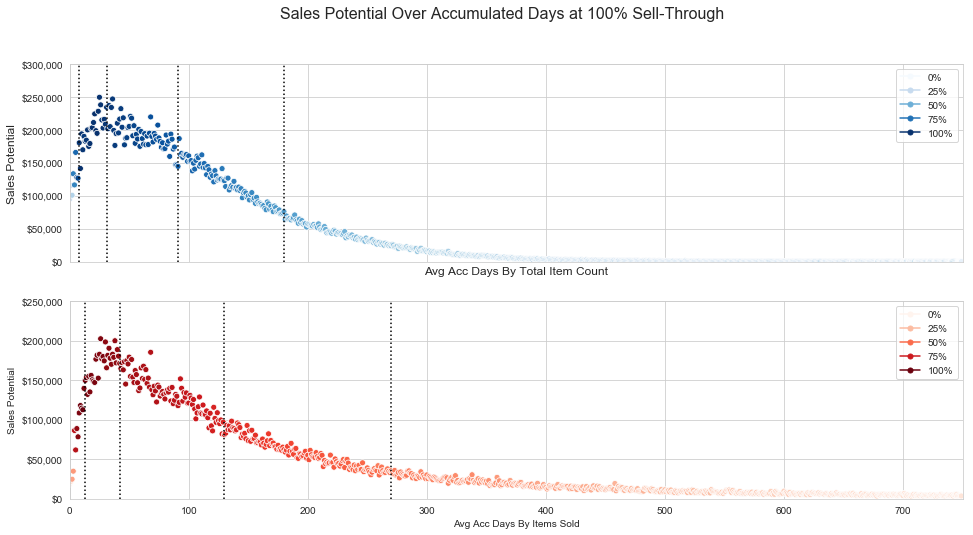

In [35]:
max_ST = 1
filt_ST = (df_Gen['Total_Sold']/df_Gen['Total_Item_Count']) <= max_ST

plt_val_Item = np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'])
plt_STHist_Item = np.nan_to_num(np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Sold'])[0]/
     np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Item_Count'])[0])

plt_val_Sold = np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'])
plt_STHist_Sold = np.nan_to_num(np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Sold'])[0]/
     np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Item_Count'])[0])
#plt_ST = (df_Gen[filt_ST]['Total_Sold']/df_Gen[filt_ST]['Total_Item_Count'])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

sns.scatterplot(plt_val_Item[1][0:-1], plt_val_Item[0], ax=ax1,
                alpha = 1, 
                hue=plt_STHist_Item, 
                palette='Blues', legend=False)
ax1.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax1.set_xlim([0,750])
ax1.set_ylim([0,300000])
ax1.set_xlabel('Avg Acc Days By Total Item Count', fontsize=12)
ax1.set_ylabel('Sales Potential', fontsize=12)
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

sns.scatterplot(plt_val_Sold[1][0:-1], plt_val_Sold[0], ax=ax2,
                alpha = 1, 
                hue=plt_STHist_Sold, 
                palette='Reds', legend=False)
ax2.set_xlim([0,750])
ax2.set_ylim([0,250000])
ax2.axvline(x=13, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=42, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=130, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=270, ymin=0, ymax=1, color='black', linestyle=':')
ax2.set_xlabel('Avg Acc Days By Items Sold')
ax2.set_ylabel('Sales Potential')
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

#Create legend
cmap1 = sns.color_palette('Blues', 100)
cmap2 = sns.color_palette('Reds', 100)
legend_labels = ['{:0.0%}'.format(p) for p in np.linspace(0, max_ST, 5)]
legend_elements1 = [Line2D([0], [0], marker='o', color=cmap1[0], label=legend_labels[0], markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[24], label=legend_labels[1], markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[49], label=legend_labels[2], markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[74], label=legend_labels[3], markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[99], label=legend_labels[4], markersize=5),
                 ]
legend_elements2 = [Line2D([0], [0], marker='o', color=cmap2[0], label=legend_labels[0], markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[24], label=legend_labels[1], markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[49], label=legend_labels[2], markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[74], label=legend_labels[3], markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[99], label=legend_labels[4], markersize=5),
                 ]

ax1.legend(handles=legend_elements1, loc = 'upper right', prop=dict(size=10))
ax2.legend(handles=legend_elements2, loc = 'upper right', prop=dict(size=10))
#ax2.get_legend().remove()

plt.suptitle('Sales Potential Over Accumulated Days at {:0.0%} Sell-Through'.format(max_ST), fontsize=16)
str_FileName = './SPAD_{:0.0%}Dist_2chart.png'.format(max_ST)
plt.savefig(str_FileName)
plt.show()


In [ ]:
filt_cat = ((df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price']) > 10000) & (df_Gen['avg_Item_Acc_Days'] < 8)
df_Gen[filt_cat]

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


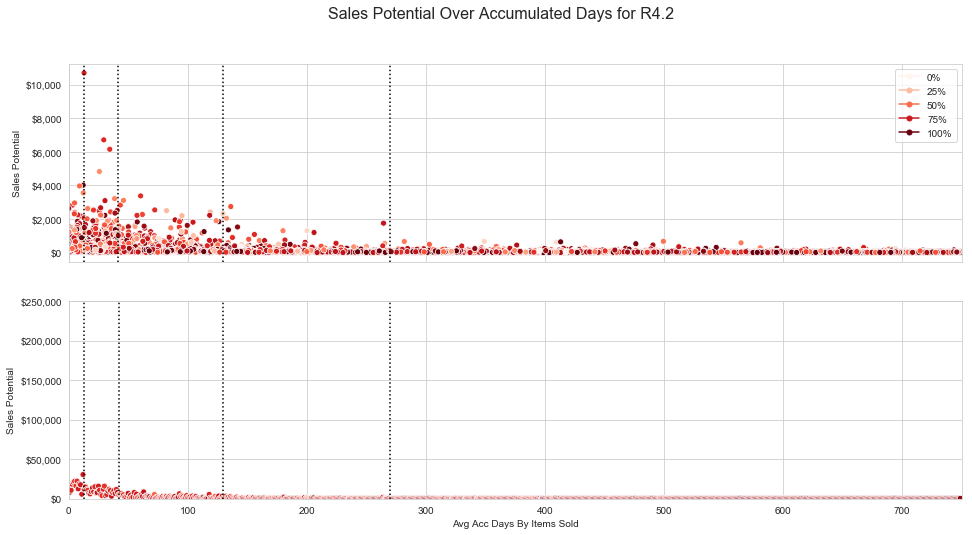

In [9]:
plt_val = np.histogram(df_Gen['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price'])

plt_val = np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'])
plt_STHist = np.nan_to_num(np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Sold'])[0]/
     np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Item_Count'])[0])
plt_ST = (df_Gen[filt_ST]['Total_Sold']/df_Gen[filt_ST]['Total_Item_Count'])

fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

sns.scatterplot(plt_val[1][0:-1], plt_val[0], ax=ax1,
                alpha = 1, 
                hue=plt_STHist, 
                palette='Reds', legend=False)
ax1.set_xlim([0,750])
ax1.set_ylim([0,250000])
ax1.axvline(x=13, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=42, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=130, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=270, ymin=0, ymax=1, color='black', linestyle=':')
ax1.set_xlabel('Avg Acc Days By Items Sold')
ax1.set_ylabel('Sales Potential')
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

sns.scatterplot(df_Gen['avg_Sold_Acc_Days'], 
                df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price'], ax=ax2,
                alpha = 1, hue=plt_ST, palette='Reds', legend=False)
ax2.set_xlim([0,750])
ax2.axvline(x=13, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=41, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=130, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=270, ymin=0, ymax=1, color='black', linestyle=':')

ax2.set_xlabel('Avg Acc Days By Total Item Count')
ax2.set_ylabel('Sales Potential')
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

#Create legend
cmap = sns.color_palette('Reds', 100)
legend_elements = [Line2D([0], [0], marker='o', color=cmap[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[24], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[49], label='50%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[74], label='75%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[99], label='100%', markersize=5),
                 ]

ax2.legend(handles=legend_elements, loc = 'upper right', prop=dict(size=10))
#ax2.get_legend().remove()
plt.suptitle('Sales Potential Over Accumulated Days for R4.2', fontsize=16)
plt.savefig('./comp_DTSbyItemsSoldDist.png')
plt.show()


In [37]:
filt_cat = ((df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price']) > 4000) & (df_Gen['avg_Sold_Acc_Days'] < 8)
df_Gen[filt_cat]

,CatalogID,CatalogBinding,qty_Purchased,R4BuyOfferAmt,R4sBuyOfferAmt,R4BuyOfferPct,R4sBuyOfferPct,Total_Accumulated_Days_With_Trash_Penalty,Total_Item_Count,Total_Sold,Avg_Sale_Price,avg_Item_Acc_Days,avg_Sold_Acc_Days
24189,1200822,General,232,9.98,9.98,0.4,0.4,7286.46,1457,1158,24.9391,5.001002,6.286851
48491,2283577,General,363,4.93,4.93,0.4,0.4,24819.06,3786,3449,12.3291,6.555483,7.193930
161208,14266438,General,1077,6.46,6.46,0.4,0.4,21509.00,3814,3337,16.1404,5.639486,6.443679
243268,13748130,General,1557,5.26,5.26,0.4,0.4,17884.74,4762,3724,13.1431,3.755720,4.801272
308499,12153336,General,904,5.59,5.59,0.4,0.4,15511.81,4025,3405,13.9866,3.853866,4.554260


C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


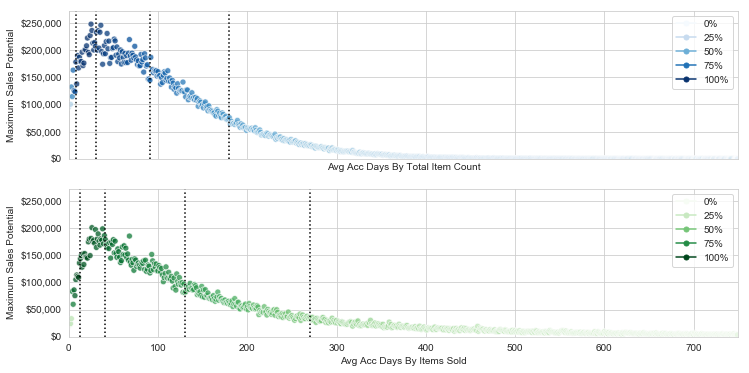

In [38]:
filt_ST = (df_Gen['Total_Sold'] / df_Gen['Total_Item_Count']) < 1

plt_val = np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'])

plt_STHist = np.nan_to_num(np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Sold'])[0]/
    np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Item_Count'])[0])
plt_ST = (df_Gen[filt_ST]['Total_Sold']/df_Gen[filt_ST]['Total_Item_Count'])
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

sns.scatterplot(plt_val[1][:-1], plt_val[0], ax=ax1,
                alpha = 0.75, hue=plt_STHist, palette='Greens', legend=False)

ax1.axvline(x=13, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=41, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=130, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=270, ymin=0, ymax=1, color='black', linestyle=':')
ax1.set_xlim([0,750])
max_yval = 1.1 * plt_val[0].max()
ax1.set_ylim([0, max_yval])
ax1.set_xlabel('Avg Acc Days By Items Sold')
ax1.set_ylabel('Maximum Sales Potential')
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 


plt_val2 = np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'])

plt_STHist2 = np.nan_to_num(np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Sold'])[0]/
    np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Item_Count'])[0])
plt_ST2 = (df_Gen[filt_ST]['Total_Sold']/df_Gen[filt_ST]['Total_Item_Count'])

sns.scatterplot(plt_val2[1][:-1], plt_val2[0], ax=ax2,
                alpha = 0.75, hue=plt_STHist2, palette='Blues', legend=False)
ax2.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax2.set_xlim([0,750])
ax2.set_xlabel('Avg Acc Days By Total Item Count')
ax2.set_ylabel('Maximum Sales Potential')
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

#Determine maximum y axis value for both axes
max_yval = 1.1 * max([plt_val[0].max(), plt_val2[0].max()])
ax1.set_ylim([0, max_yval])
ax2.set_ylim([0, max_yval])

#Create legend
cmap1 = sns.color_palette('Blues', 100)
cmap2 = sns.color_palette('Greens', 100)
legend_elements1 = [Line2D([0], [0], marker='o', color=cmap1[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[24], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[49], label='50%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[74], label='75%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[99], label='100%', markersize=5)]
legend_elements2 = [Line2D([0], [0], marker='o', color=cmap2[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[24], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[49], label='50%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[74], label='75%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[99], label='100%', markersize=5)]

ax1.legend(handles=legend_elements2, loc = 'upper right', prop=dict(size=10))
ax2.legend(handles=legend_elements1, loc = 'upper right', prop=dict(size=10))
#ax2.get_legend().remove()

plt.show()

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


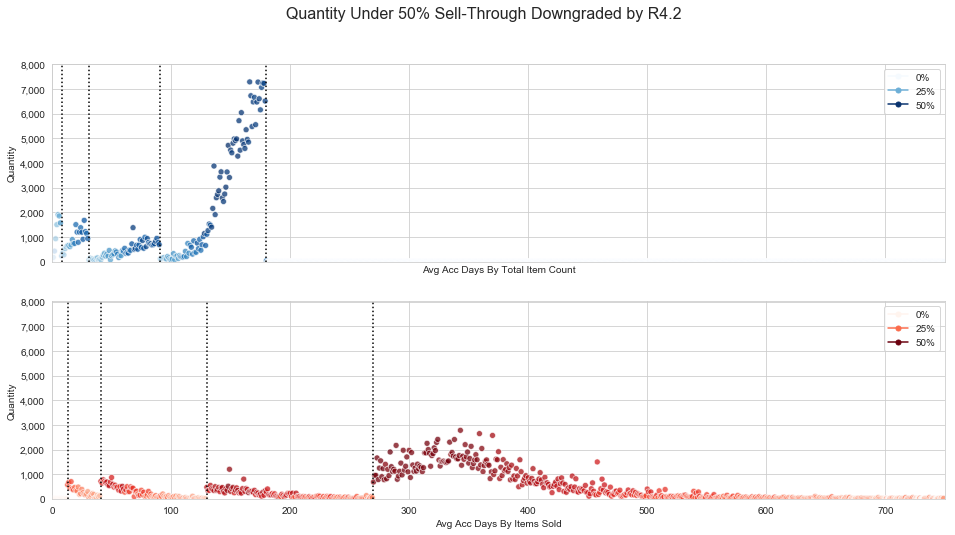

In [39]:
filt_R42Lowered = ((df_Gen['Total_Sold'] / df_Gen['Total_Item_Count']) <= 0.5) & (df_Gen['R4sBuyOfferPct'] < df_Gen['R4BuyOfferPct'])

plt_valR40 = np.histogram(df_Gen[filt_R42Lowered]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_R42Lowered]['qty_Purchased'])# * df_Gen[filt_R42Lowered]['Avg_Sale_Price'])
plt_valR42 = np.histogram(df_Gen[filt_R42Lowered]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_R42Lowered]['qty_Purchased'])# * df_Gen[filt_R42Lowered]['Avg_Sale_Price'])

plt_STHistR40 = np.nan_to_num(np.histogram(df_Gen[filt_R42Lowered]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_R42Lowered]['Total_Sold'])[0]/
    np.histogram(df_Gen[filt_R42Lowered]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_R42Lowered]['Total_Item_Count'])[0])

plt_STHistR42 = np.nan_to_num(np.histogram(df_Gen[filt_R42Lowered]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_R42Lowered]['Total_Sold'])[0]/
    np.histogram(df_Gen[filt_R42Lowered]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_R42Lowered]['Total_Item_Count'])[0])

plt_ST = (df_Gen[filt_R42Lowered]['Total_Sold']/df_Gen[filt_R42Lowered]['Total_Item_Count'])


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

sns.scatterplot(plt_valR40[1][:-1], plt_valR40[0], ax=ax1,
                alpha = 0.75, hue=plt_STHistR40, palette='Blues', legend=False)


ax1.set_xlim([0,750])
ax1.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')

ax1.set_xlabel('Avg Acc Days By Total Item Count')
ax1.set_ylabel('Quantity')
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) 
cmap1 = sns.color_palette('Blues', 100)
legend_elements1 = [Line2D([0], [0], marker='o', color=cmap1[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[49], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[99], label='50%', markersize=5)]

ax1.legend(handles=legend_elements1, loc = 'upper right', prop=dict(size=10))

sns.scatterplot(plt_valR42[1][:-1], plt_valR42[0], ax=ax2,
                alpha = 0.75, hue=plt_STHistR42, palette='Reds', legend=False)
ax2.set_xlim([0,750])
#ax1.set_ylim([0,250000])
ax2.axvline(x=13, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=41, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=130, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=270, ymin=0, ymax=1, color='black', linestyle=':')
ax2.set_xlabel('Avg Acc Days By Items Sold')
ax2.set_ylabel('Quantity')
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) 

#Create legend
cmap2 = sns.color_palette('Reds', 100)
legend_elements2 = [Line2D([0], [0], marker='o', color=cmap2[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[49], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[99], label='50%', markersize=5)]

ax2.legend(handles=legend_elements2, loc = 'upper right', prop=dict(size=10))

max_yval = 1.1 * max([plt_valR40[0].max(), plt_valR42[0].max()])
ax1.set_ylim([0, max_yval])
ax2.set_ylim([0, max_yval])

plt.suptitle('Quantity Under 50% Sell-Through Downgraded by R4.2', fontsize=16)
plt.savefig('./dist_QtyR42Downgraded.png')
plt.show()

In [40]:
%matplotlib notebook

In [41]:
# Set up formatting for the movie files
Writer = animation.writers['pillow']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)

In [42]:
class AnimatedScatter_SoldDist(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, df_Gen, range_ST, num_frames):
        self.df_Gen = df_Gen
        self.min_ST = range_ST[0]
        self.max_ST = range_ST[1]
        self.num_frames = num_frames
        self.stream = self.data_stream()
        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots(figsize=(12, 6))
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                           init_func=self.setup_plot, save_count=self.num_frames-1,
                                           blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, c = next(self.stream).T
        self.scat = self.ax.scatter(x, y, c=c, s=25, cmap='Reds', alpha=1, edgecolor='k', vmin=0, vmax=1)
        self.ax.axis([0, 750, 0, 250000])
        self.ax.axvline(x=13, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=41, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=130, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=270, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.set_xlabel('Avg Acc Days By Items Sold')
        self.ax.set_ylabel('Sales Potential')
        cmap = sns.color_palette('Reds', 100)
        legend_elements = [Line2D([0], [0], marker='o', color=cmap[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[24], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[49], label='50%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[74], label='75%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[99], label='100%', markersize=5)]
        self.ax.legend(handles=legend_elements, loc = 'upper right', prop=dict(size=10))
        self.ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        for s in np.linspace(self.min_ST, self.max_ST, num=self.num_frames):
            filt_ST = (self.df_Gen['Total_Sold'] / self.df_Gen['Total_Item_Count']) <= s
            xy = np.histogram(self.df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['qty_Purchased'] * self.df_Gen[filt_ST]['Avg_Sale_Price'])
            c = np.nan_to_num(np.histogram(self.df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['Total_Sold'])[0]/
                                   np.histogram(self.df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['Total_Item_Count'])[0])
            yield np.c_[xy[1][:-1], xy[0], c]

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)
        str_title = 'Sales Potential at ' + '{:0.0%}'.format((self.max_ST - self.min_ST) * ((i+2) / self.num_frames) + self.min_ST) + ' Maximum Sell-Through'
        self.ax.set_title(str_title)
        # Set x and y data...
        self.scat.set_offsets(data[:, :2])
        # Set sizes...
        #self.scat.set_sizes(1)
        # Set colors..
        self.scat.set_array(data[:, 2])
        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

In [43]:
class AnimatedScatter_CountDist(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, df_Gen, range_ST, num_frames):
        self.df_Gen = df_Gen
        self.min_ST = range_ST[0]
        self.max_ST = range_ST[1]
        self.num_frames = num_frames
        self.stream = self.data_stream()
        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots(figsize=(12, 6))
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                           init_func=self.setup_plot, save_count=self.num_frames-1,
                                           blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, c = next(self.stream).T
        self.scat = self.ax.scatter(x, y, c=c, s=25, cmap='Blues', alpha=1, edgecolor='k', vmin=0, vmax=1)
        self.ax.axis([0, 750, 0, 300000])
        self.ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.set_xlabel('Avg Acc Days By Total Item Count')
        self.ax.set_ylabel('Sales Potential')
        cmap = sns.color_palette('Blues', 100)
        legend_elements = [Line2D([0], [0], marker='o', color=cmap[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[24], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[49], label='50%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[74], label='75%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[99], label='100%', markersize=5)]
        self.ax.legend(handles=legend_elements, loc = 'upper right', prop=dict(size=10))
        self.ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        for s in np.linspace(self.min_ST, self.max_ST, num=self.num_frames):
            filt_ST = (self.df_Gen['Total_Sold'] / self.df_Gen['Total_Item_Count']) <= s
            xy = np.histogram(self.df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['qty_Purchased'] * self.df_Gen[filt_ST]['Avg_Sale_Price'])
            c = np.nan_to_num(np.histogram(self.df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['Total_Sold'])[0]/
                                   np.histogram(self.df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['Total_Item_Count'])[0])
            yield np.c_[xy[1][:-1], xy[0], c]

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)
        # Set x and y data...
        str_title = 'Sales Potential at ' + '{:0.0%}'.format((self.max_ST - self.min_ST) * ((i+2) / self.num_frames) + self.min_ST) + ' Maximum Sell-Through'
        self.ax.set_title(str_title)
        self.scat.set_offsets(data[:, :2])
        # Set sizes...
        #self.scat.set_sizes(1)
        # Set colors..
        self.scat.set_array(data[:, 2])
        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

In [ ]:
a = AnimatedScatter_CountDist(df_Gen, [0, 0.25], 250)
#plt.show()
a.ani.save('DTS_ItemDistByST_0to25.gif', writer=writer)

In [ ]:
a = AnimatedScatter_CountDist(df_Gen, [0.25, 0.50], 250)
#plt.show()
a.ani.save('DTS_ItemDistByST_25to50.gif', writer=writer)

In [ ]:
a = AnimatedScatter_CountDist(df_Gen, [0.50, 0.75], 250)
#plt.show()
a.ani.save('DTS_ItemDistByST_50to75.gif', writer=writer)

In [ ]:
a = AnimatedScatter_CountDist(df_Gen, [0.75, 1], 250)
#plt.show()
a.ani.save('DTS_ItemDistByST_75to100.gif', writer=writer)

In [ ]:
a = AnimatedScatter_SoldDist(df_Gen, [0, 0.25], 250)
#plt.show()
a.ani.save('DTS_SoldDistByST_0to25.gif', writer=writer)

In [ ]:
a = AnimatedScatter_SoldDist(df_Gen, [0.25, 0.50], 250)
#plt.show()
a.ani.save('DTS_SoldDistByST_25to50.gif', writer=writer)

In [ ]:
a = AnimatedScatter_SoldDist(df_Gen, [0.50, 0.75], 250)
#plt.show()
a.ani.save('DTS_SoldDistByST_50to75.gif', writer=writer)

In [ ]:
a = AnimatedScatter_SoldDist(df_Gen, [0.75, 1], 250)
#plt.show()
a.ani.save('DTS_SoldDistByST_75to100.gif', writer=writer)